In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [3]:
# Perform a weather check on each city using a series of successive API calls.
cities_df = pd.DataFrame(cities, columns=["City"])
cities_df["Lat"] = ''
cities_df["Lng"] = ''
cities_df["Max Temp"] = ''
cities_df["Humidity"] = ''
cities_df["Cloudiness"] = ''
cities_df["Wind Speed"] = ''
cities_df["Country"] = ''
cities_df["Date"] = ''

In [60]:
# Include a print log of each city as it'sbeing processed (with the city number and city name).
for index, row in cities_df.iterrows():
    target_city = row['City']
    url = f"http://api.openweathermap.org/data/2.5/weather?q={target_city}&appid={weather_api_key}&units=imperial"
    results = requests.get(url).json()
    print(f"Retrieving Results for {target_city}.")
    try:
        cities_df.loc[index, "Lat"] = results['coord']['lat']
        cities_df.loc[index, "Lng"] = results['coord']['lon']
        cities_df.loc[index, "Max Temp"] = results['main']['temp_max']
        cities_df.loc[index, "Humidity"] = results['main']['humidity']
        cities_df.loc[index, "Cloudiness"] = results['clouds']['all']
        cities_df.loc[index, "Wind Speed"] = results['wind']['speed']
        cities_df.loc[index, "Country"] = results['sys']['country']
        cities_df.loc[index, "Date"] = results['dt']
    except (KeyError, IndexError):
        print("City not found. Skipping...")

Retrieving Results for chuy.
Retrieving Results for vaini.
Retrieving Results for dikson.
Retrieving Results for provideniya.
Retrieving Results for yellowknife.
Retrieving Results for souillac.
Retrieving Results for rio gallegos.
Retrieving Results for bereda.
Retrieving Results for deputatskiy.
Retrieving Results for rikitea.
Retrieving Results for nanortalik.
Retrieving Results for camana.
Retrieving Results for mataura.
Retrieving Results for saint anthony.
Retrieving Results for chokurdakh.
Retrieving Results for salalah.
Retrieving Results for port hardy.
Retrieving Results for hilo.
Retrieving Results for wynyard.
Retrieving Results for norman wells.
Retrieving Results for butaritari.
Retrieving Results for komsomolskiy.
Retrieving Results for okha.
Retrieving Results for saint-jean-de-maurienne.
Retrieving Results for east london.
Retrieving Results for hermanus.
Retrieving Results for ribeira grande.
Retrieving Results for new norfolk.
Retrieving Results for lagoa.
Retrieving

Retrieving Results for pocone.
Retrieving Results for havre-saint-pierre.
Retrieving Results for naze.
Retrieving Results for niquelandia.
Retrieving Results for castro.
Retrieving Results for lorengau.
Retrieving Results for aquiraz.
Retrieving Results for emerald.
Retrieving Results for lethem.
Retrieving Results for mount isa.
Retrieving Results for myszkow.
Retrieving Results for coihaique.
Retrieving Results for torbay.
Retrieving Results for khor.
Retrieving Results for tautira.
Retrieving Results for ust-nera.
Retrieving Results for asfi.
Retrieving Results for bambanglipuro.
Retrieving Results for brae.
Retrieving Results for pouebo.
Retrieving Results for owando.
Retrieving Results for limbang.
Retrieving Results for lompoc.
Retrieving Results for geraldton.
Retrieving Results for quang ngai.
Retrieving Results for mwene-ditu.
Retrieving Results for cherskiy.
Retrieving Results for makokou.
Retrieving Results for olafsvik.
Retrieving Results for te anau.
Retrieving Results for

Retrieving Results for the valley.
Retrieving Results for nome.
Retrieving Results for belyy yar.
Retrieving Results for elk city.
Retrieving Results for nouakchott.
Retrieving Results for tukrah.
Retrieving Results for astoria.
Retrieving Results for savelugu.
Retrieving Results for smoky lake.
Retrieving Results for cururupu.
Retrieving Results for nhulunbuy.
Retrieving Results for longyan.
Retrieving Results for gamboula.
Retrieving Results for itarema.
Retrieving Results for netrakona.
Retrieving Results for yaring.
Retrieving Results for alekseyevsk.
Retrieving Results for bria.
Retrieving Results for rybnaya sloboda.
Retrieving Results for tornio.
Retrieving Results for acajutiba.
Retrieving Results for ejido.
Retrieving Results for zakamensk.
Retrieving Results for longyearbyen.
Retrieving Results for foumban.
Retrieving Results for tampayan.
Retrieving Results for rawson.
Retrieving Results for qaqortoq.
Retrieving Results for atar.
Retrieving Results for knysna.
Retrieving Res

In [61]:
# Export the city data into a .csv.
cities_df.to_csv(output_data_file, index=False)
# Display the DataFrame
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-33.6971,-53.4616,70.09,96.0,2.0,6.24,UY,1.611454e+09
1,vaini,-21.2000,-175.2000,78.80,94.0,75.0,8.05,TO,1.611454e+09
2,dikson,73.5069,80.5464,-16.96,90.0,69.0,7.07,RU,1.611454e+09
3,provideniya,64.3833,-173.3000,7.03,84.0,1.0,2.01,RU,1.611454e+09
4,yellowknife,62.4560,-114.3525,-24.00,75.0,1.0,3.44,CA,1.611454e+09


In [62]:
# Drop cities not found.
cities_df.replace('',np.nan)
clean_city_data = cities_df.dropna(how='any',inplace=False)
clean_city_data = clean_city_data.reset_index(drop=True)

In [76]:
# Inspect the data and remove the cities where the humidity > 100%.
# Get the indices of cities that have humidity over 100%.
clean_city_data.loc[clean_city_data['Humidity'] > 100]
clean_city_data.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-33.6971,-53.4616,70.09,96.0,2.0,6.24,UY,1.611454e+09
1,vaini,-21.2000,-175.2000,78.80,94.0,75.0,8.05,TO,1.611454e+09
2,dikson,73.5069,80.5464,-16.96,90.0,69.0,7.07,RU,1.611454e+09
3,provideniya,64.3833,-173.3000,7.03,84.0,1.0,2.01,RU,1.611454e+09
4,yellowknife,62.4560,-114.3525,-24.00,75.0,1.0,3.44,CA,1.611454e+09
5,souillac,-20.5167,57.5167,75.20,94.0,40.0,2.30,MU,1.611454e+09
6,rio gallegos,-51.6226,-69.2181,62.60,34.0,0.0,6.91,AR,1.611454e+09
7,bereda,43.2686,-7.5406,48.99,100.0,99.0,8.99,ES,1.611454e+09
8,deputatskiy,69.3000,139.9000,-35.32,85.0,99.0,2.21,RU,1.611454e+09
9,rikitea,-23.1203,-134.9692,79.52,63.0,15.0,6.58,PF,1.611454e+09


In [64]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [65]:
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

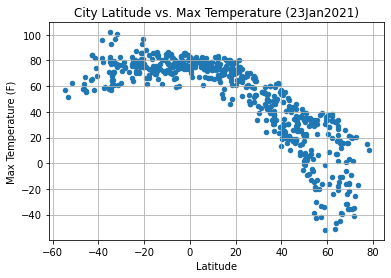

In [77]:
# Latitude vs. Temperature Plot
clean_city_data.plot(kind="scatter",x="Lat",y="Max Temp",title="City Latitude vs. Max Temperature (23Jan2021)",grid=True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/lat_temp_scatter.png")
plt.show()

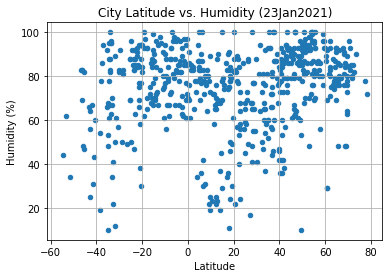

In [78]:
# Latitude vs. Humidity Plot
clean_city_data.plot(kind="scatter",x="Lat",y="Humidity",title="City Latitude vs. Humidity (23Jan2021)",grid=True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/lat_humid_scatter.png")
plt.show()

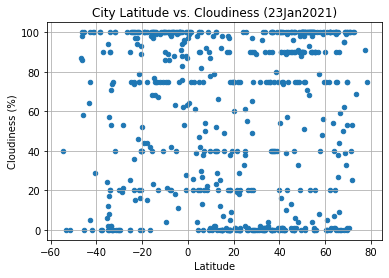

In [80]:
# Latitude vs. Cloudiness Plot
clean_city_data.plot(kind="scatter",x="Lat",y="Cloudiness",title="City Latitude vs. Cloudiness (23Jan2021)",grid=True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/lat_cloud_scatter.png")
plt.show()

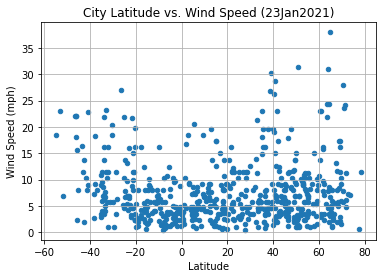

In [81]:
# Latitude vs. Wind Speed Plot
clean_city_data.plot(kind="scatter",x="Lat",y="Wind Speed",title="City Latitude vs. Wind Speed (23Jan2021)",grid=True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/lat_wind_scatter.png")
plt.show()

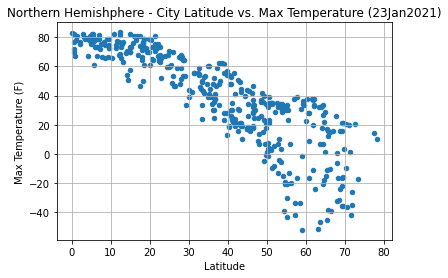

In [86]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
north_cities = clean_city_data.loc[clean_city_data['Lat'] > 0]
north_cities.plot(kind="scatter",x="Lat",y="Max Temp",title="Northern Hemishphere - City Latitude vs. Max Temperature (23Jan2021)",grid=True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/north_lat_temp_regression.png")
plt.show()

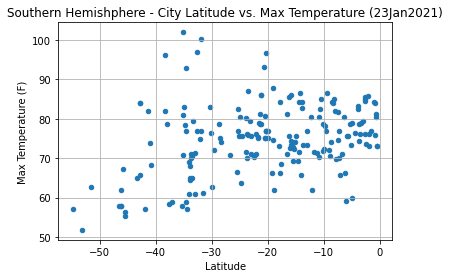

In [94]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
south_cities = clean_city_data.loc[clean_city_data['Lat'] < 0]
south_cities.plot(kind="scatter",x="Lat",y="Max Temp",title="Southern Hemishphere - City Latitude vs. Max Temperature (23Jan2021)",grid=True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/south_lat_temp_regression.png")
plt.show()

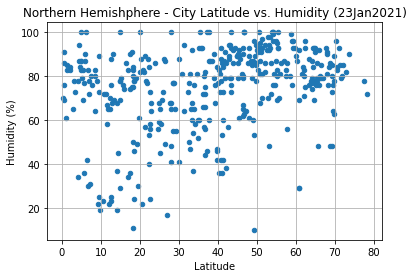

In [87]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
north_cities.plot(kind="scatter",x="Lat",y="Humidity",title="Northern Hemishphere - City Latitude vs. Humidity (23Jan2021)",grid=True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/north_lat_humid_regression.png")
plt.show()

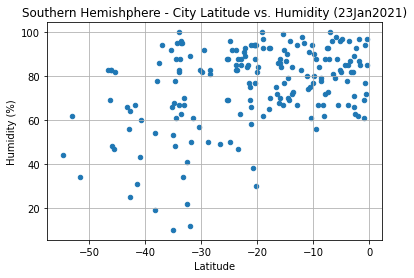

In [93]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
south_cities.plot(kind="scatter",x="Lat",y="Humidity",title="Southern Hemishphere - City Latitude vs. Humidity (23Jan2021)",grid=True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/south_lat_humid_regression.png")
plt.show()

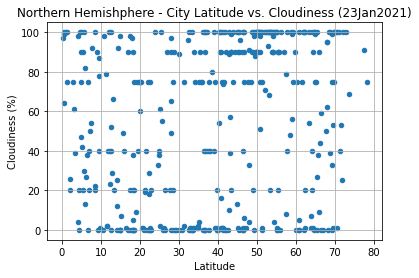

In [89]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
north_cities.plot(kind="scatter",x="Lat",y="Cloudiness",title="Northern Hemishphere - City Latitude vs. Cloudiness (23Jan2021)",grid=True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/north_lat_cloud_regression.png")
plt.show()

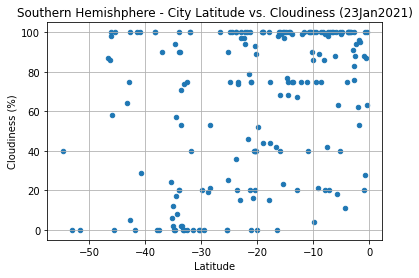

In [92]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
south_cities.plot(kind="scatter",x="Lat",y="Cloudiness",title="Southern Hemishphere - City Latitude vs. Cloudiness (23Jan2021)",grid=True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/south_lat_cloud_regression.png")
plt.show()

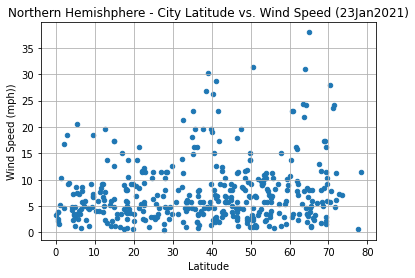

In [90]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
north_cities.plot(kind="scatter",x="Lat",y="Wind Speed",title="Northern Hemishphere - City Latitude vs. Wind Speed (23Jan2021)",grid=True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.savefig("output_data/north_lat_wind_regression.png")
plt.show()

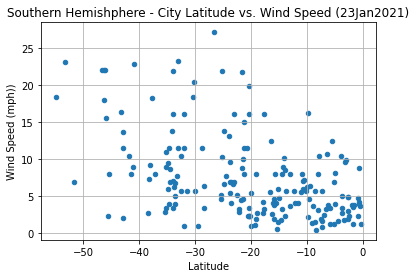

In [91]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
south_cities.plot(kind="scatter",x="Lat",y="Wind Speed",title="Southern Hemishphere - City Latitude vs. Wind Speed (23Jan2021)",grid=True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.savefig("output_data/south_lat_wind_regression.png")
plt.show()